# **UNDERSTANDING CONSUMER BEHAVIOUR ANALYSIS. A MACHINE LEARNING APPROACH FOR E-COMMERCE TRENDS.**

**Student Name: Cynthia Wanyeki**

**Technical Mentor: Nikita Njoroge, Diana Mong'ina, Lucille Kaleha.**

**Phase: Phase 3 Project**

**Deadline: 1st December 2023.**

[1. INTRODUCTION](#1.INTRODUCTION) </br>
[1.1 BUSINESS UNDERSTANDING](#1.1BUSINESS-UNDERSTANDING) </br>
[1.2 Problem Statement](#1.2Problem-Statement) </br>
[1.3 Objectives](#1.3Objectives) </br>
[1.3.1 Main Objective](#1.3.1Main-Objective) </br>
[1.3.2 Specific Objective](#1.3.2Specific-Objectives) </br>
[2. Libraries](#2.LOADING-LIBRARIES) </br>
[3. Data Understanding](#3.Data-Understanding) </br>
[4. Data preprocessing](#4.Data-preprocessing) </br>
[4.1 Data Cleaning](#4.1Data-Cleaning) </br>
[4.2 Handling Missing Values](#4.2Handling-Missing-Values) </br>
[4.3 Check Info](#4.3Check-info) </br>
[5. EXPLORATORY DATA ANALYSIS](#5.EXPLORATION-DATA-ANALYSIS) </br>
[5.1 Univariate Analysis](#5.1Univariate-Analysis) </br>
[5.2 Categorical Data](#5.2Categorical-Data)</br>
[5.3 Bivariate analysis](#5.2Bivariate-analysis) </br>
[6. Feature Engineering](#6.Feature-Engineering) </br>
[7. Modelling](#7.Data-Modelling) </br>
[7.1 KMeans](#7.1KMeans) </br>
[7.2 Logistic regression](#7.2Logistic-regression) </br>
[7.3 Decision Trees](#7.5Decision-Trees) </br>
[7.4 Ensemble Methods](#7.5Ensemble-Methods) </br>
[7.5 XGBoost](#7.5XGBoost) </br>
[8. Data Evaluation](#8.Data-Evaluation) </br>
[8.1 Evaluating XGBoost](#8.1Evaluating-XGBoost) </br>
[8.2 Evaluating Linear Regression](#8.2Evaluating-Linear-Regression) </br>
[8.3 KMeans](#8.3KMeans) </br>
[8.4 Evaluating Decision Trees](#8.4Evaluating-Decision-Trees) </br>
[9. Deployment](#9.Deployment) </br>
[9.1 Save Model using Joblib](#9.1Save-model-using-Joblib) </br>
[9.2 Deploy using Streamlit](#9.2Deploy-using-streamlit) </br>
[10. Conclusion](#10.Conclusion) </br>
[11. Recommendations](#10.Recommendations) </br>

# **1.) INTRODUCTION.**

The aim of this project is to analyse consumer behaviour on E-Commerce platform and build a model that can improve engagement on these platforms in order to make more sales.

The online market is the largest platform and E-Commerce when tapped into really well is a amazing way to make more sales.

This analysis uses a real-time project dataset from Kaggle for Amazon Customer Behavior Survey and Shopping Behavior Survey.

# **1.1) BUSINESS UDERSTANDING**

The e-commerce industry has witnessed unprecedented growth in recent years, with a surge in online shopping platforms providing consumers with a plethora of choices. Understanding customer behavior on these platforms is crucial for businesses to enhance user experience, optimize marketing strategies, and ultimately boost sales. This project aims to delve into the nuances of customer behavior on e-commerce platforms, uncovering patterns and insights that can inform strategic decision-making.

# **1.2) PROBLEM STATEMENT.**


Despite the rapid growth of the e-commerce sector, businesses face challenges in comprehensively understanding customer behavior. The lack of detailed insights into user preferences, navigation patterns, and purchase decision factors hinders the ability to tailor services and offerings effectively. This project aims to address this gap by conducting a thorough analysis of customer behavior on e-commerce platforms, identifying pain points, and proposing solutions for a more personalized and seamless user experience.

# **1.3) OBJECTIVES.**


**Customer Segmentation:** Identify and classify different customer segments based on their behavior, preferences, and buying patterns.

**User Journey Analysis**: Map out the typical user journey on the e-commerce platform, highlighting key touchpoints, drop-offs, and areas of improvement.

**Product Affinity Analysis:** Understand the relationships between products, analyzing which items are often purchased together or in succession.

**Conversion Rate Optimization:** Identify factors influencing conversion rates and propose strategies to optimize the conversion funnel.

**Predictive Analytics:** Utilize predictive modeling to forecast future trends in customer behavior and anticipate potential challenges.

# **2.) LIBRARIES.**

**2.1) Importing Libraries**

In [1]:
#import libraries
import warnings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
pd.set_option('display.max_columns', None)
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,\
GradientBoostingClassifier
import xgboost as xgb

# **2.2) LOADING DATASETS**

In [2]:
#load the Amazon_Customer_Behavior_Survey dataset
df_Amazon= pd.read_csv('/content/Amazon Customer Behavior Survey.csv')
df_Amazon.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


# **3. DATA UNDERSTANDING**

**3.1) Understanding column names, Data types and Summary Statistics for the Amazon Dataset**

In [3]:
# Display basic information about the Amazon dataset
df_Amazon.info()

# Check for missing values
df_Amazon.isnull().sum()

# Explore statistics of numerical columns
df_Amazon.describe()

# Explore unique values in categorical columns
for column in df_Amazon.select_dtypes(include='object').columns:
    print(f"{column}: {df_Amazon[column].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

25 Columns

601 Rows



**3.3) Check info.**

In [4]:
#Check info for Amazon dataset
print('Amazon Dataset')
df_Amazon.info()




Amazon Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    obj

**AMAZON DATASET**

Rows=601

Columns=23

Numerical variables = 320

Categorical variables = 18

dtypes: category(1), float64(8), object(16)




In [5]:
column_names= df_Amazon.columns
column_names

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

# **4. DATA CLEANING**

In [6]:

import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df_Amazon is your DataFrame

# Handle Missing Values
numerical_cols = ['age', 'Rating_Accuracy ', 'Shopping_Satisfaction']
categorical_cols = ['Personalized_Recommendation_Frequency ', 'Service_Appreciation', 'Improvement_Areas']

# Impute missing values in numerical features with mean
imputer_numeric = SimpleImputer(strategy='mean')
df_Amazon[numerical_cols] = imputer_numeric.fit_transform(df_Amazon[numerical_cols])

# Impute missing values in categorical features with most frequent category
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_Amazon[categorical_cols] = imputer_categorical.fit_transform(df_Amazon[categorical_cols])

# Remove unnecessary columns
columns_to_drop = ['Timestamp', 'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ', 'Improvement_Areas']
df_Amazon_cleaned = df_Amazon.drop(columns=columns_to_drop, axis=1)
df_Amazon_cleaned


,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation
0,23.0,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,Yes,1.0,Competitive prices
1,23.0,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,Sometimes,2.0,Wide product selection
2,24.0,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,No,3.0,Competitive prices
3,24.0,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,Sometimes,4.0,Competitive prices
4,22.0,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,Yes,2.0,Competitive prices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,23.0,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Moderately,Sometimes,Sometimes,4.0,Competitive prices
598,23.0,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Sometimes,Sometimes,3.0,Product recommendations
599,23.0,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,Sometimes,High shipping costs,Sometimes,Yes,Occasionally,Sometimes,Sometimes,3.0,Wide product selection
600,23.0,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,others,Sometimes,No,Heavily,Yes,Yes,2.0,Wide product selection


In [7]:
# Print the first few rows of the cleaned dataset
print(df_Amazon_cleaned.head())

# Check for missing values
print("Missing values in the cleaned dataset:")
print(df_Amazon_cleaned.isnull().sum())


    age             Gender      Purchase_Frequency  \
0  23.0             Female       Few times a month   
1  23.0             Female            Once a month   
2  24.0  Prefer not to say       Few times a month   
3  24.0             Female            Once a month   
4  22.0             Female  Less than once a month   

                                 Purchase_Categories  \
0                           Beauty and Personal Care   
1                               Clothing and Fashion   
2    Groceries and Gourmet Food;Clothing and Fashion   
3  Beauty and Personal Care;Clothing and Fashion;...   
4      Beauty and Personal Care;Clothing and Fashion   

  Personalized_Recommendation_Frequency Browsing_Frequency  \
0                                   Yes   Few times a week   
1                                   Yes  Few times a month   
2                                    No  Few times a month   
3                             Sometimes  Few times a month   
4                           

In [8]:
#Handling missing values
# Impute missing values with the mode
mode_value = df_Amazon_cleaned['Product_Search_Method'].mode()[0]
df_Amazon_cleaned['Product_Search_Method'].fillna(mode_value, inplace=True)
print(df_Amazon_cleaned.isnull().sum())


age                                      0
Gender                                   0
Purchase_Frequency                       0
Purchase_Categories                      0
Personalized_Recommendation_Frequency    0
Browsing_Frequency                       0
Product_Search_Method                    0
Search_Result_Exploration                0
Customer_Reviews_Importance              0
Add_to_Cart_Browsing                     0
Cart_Completion_Frequency                0
Cart_Abandonment_Factors                 0
Saveforlater_Frequency                   0
Review_Left                              0
Review_Reliability                       0
Review_Helpfulness                       0
Recommendation_Helpfulness               0
Shopping_Satisfaction                    0
Service_Appreciation                     0
dtype: int64


# **5. EXPLORATORY DATA ANALYSIS.**

Perform EDA to explore the datasets and understand their distribution, relationships and patterns.

Visualizations are essential for summary statistics in order to gain insights.

**5.1 UNIVARIATE ANALYSIS**

The purpose of a univariate analysis is to Understand the distribution and characteristics of individual variables.

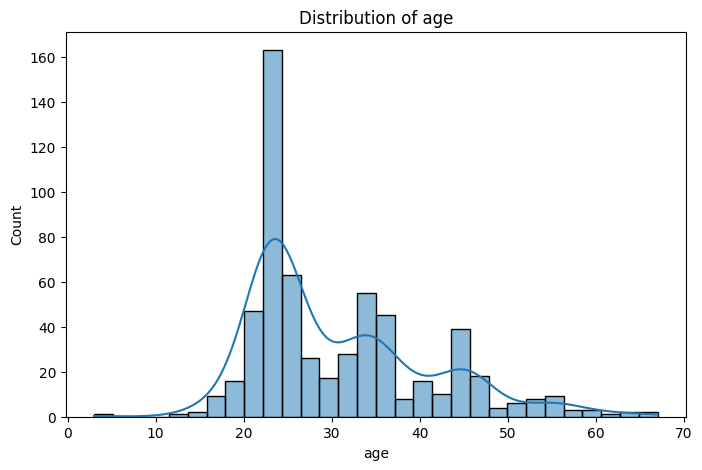

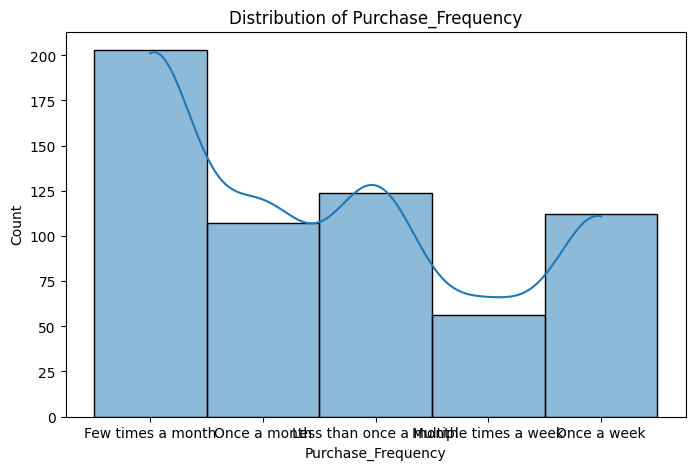

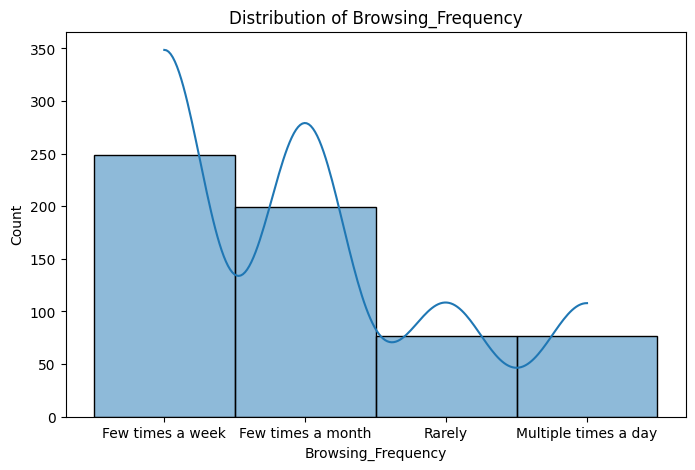

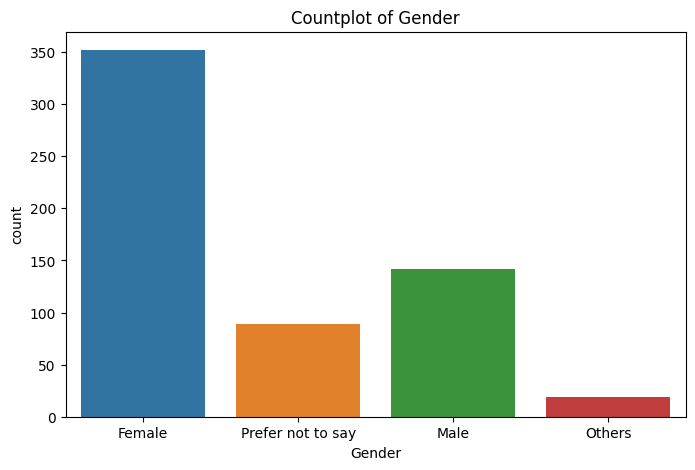

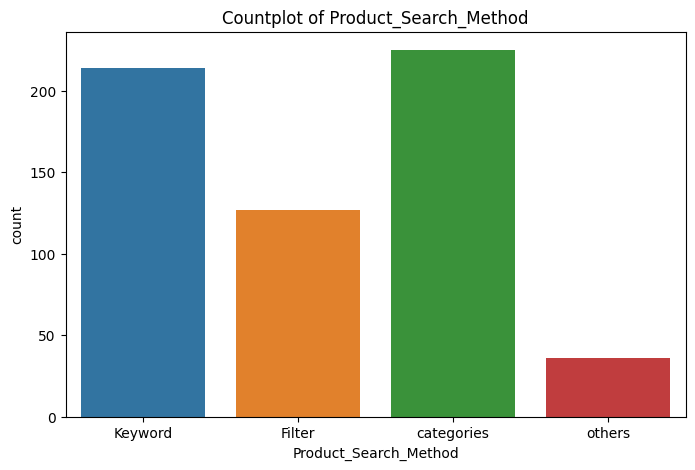

In [9]:

# Univariate analysis for numerical features
numerical_features = ['age', 'Purchase_Frequency', 'Browsing_Frequency']

# Histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_Amazon_cleaned[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()

# Univariate analysis for categorical features
categorical_features = ['Gender', 'Product_Search_Method']

# Countplots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df_Amazon_cleaned)
    plt.title(f'Countplot of {feature}')
    plt.show()



-The highest age group of consumers are between 20-30 yrs

-Thee purchase frequency is relatively equal with most consumers making a purchase once a month.

-The browsing frequency is few times a week and few times a month.

-Females make up the largest number of consumers in terms of gender distribution.

-Most consumers search for products via  keywords and categories.

**5.3) BIVARIATE** **ANALYSIS.**

The purpose of bivariate analysis is to explore the relationship and associations between pairs of variables.

In [10]:
# Select numerical variables
numerical_vars = df_Amazon_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Select categorical variables
categorical_vars = df_Amazon_cleaned.select_dtypes(include=['object']).columns

print("Numerical Variables:")
print(numerical_vars)

print("\nCategorical Variables:")
print(categorical_vars)


Numerical Variables:
Index(['age', 'Customer_Reviews_Importance', 'Shopping_Satisfaction'], dtype='object')

Categorical Variables:
Index(['Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Service_Appreciation'],
      dtype='object')


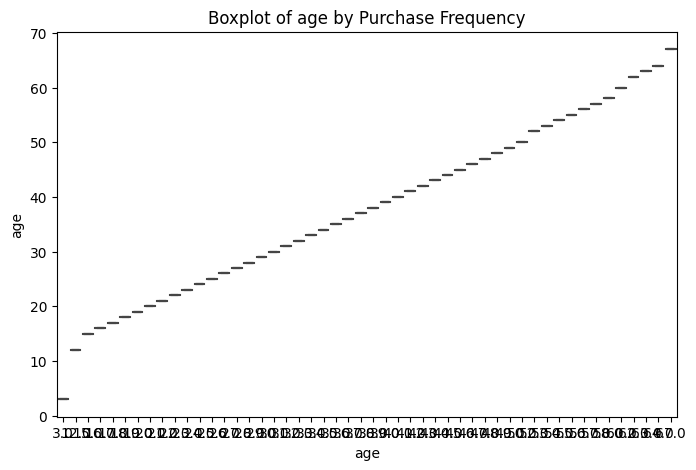

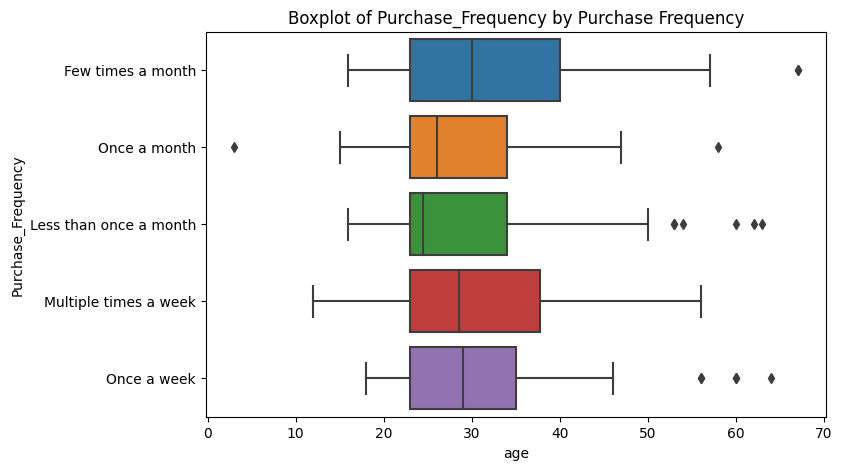

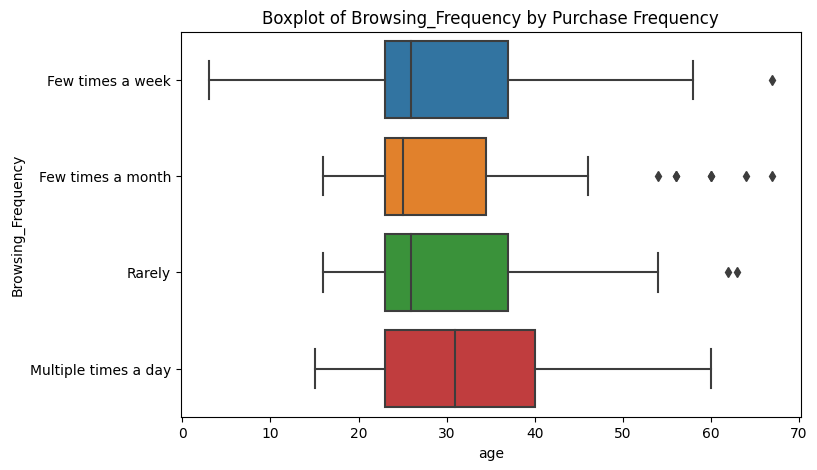

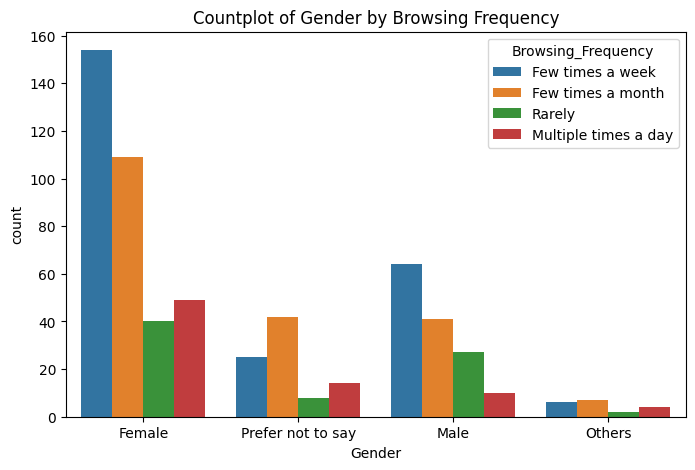

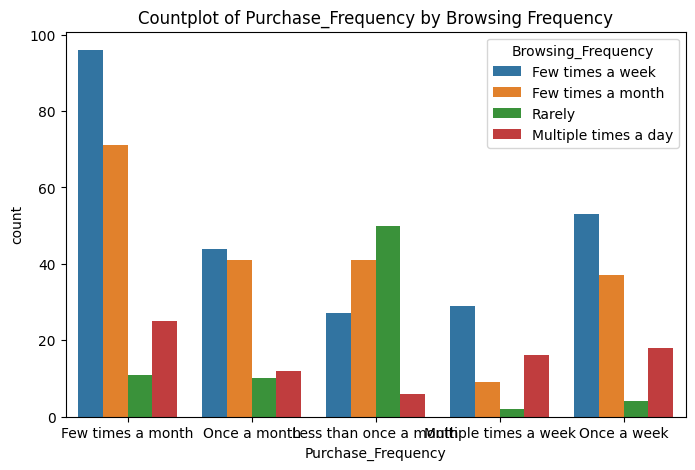

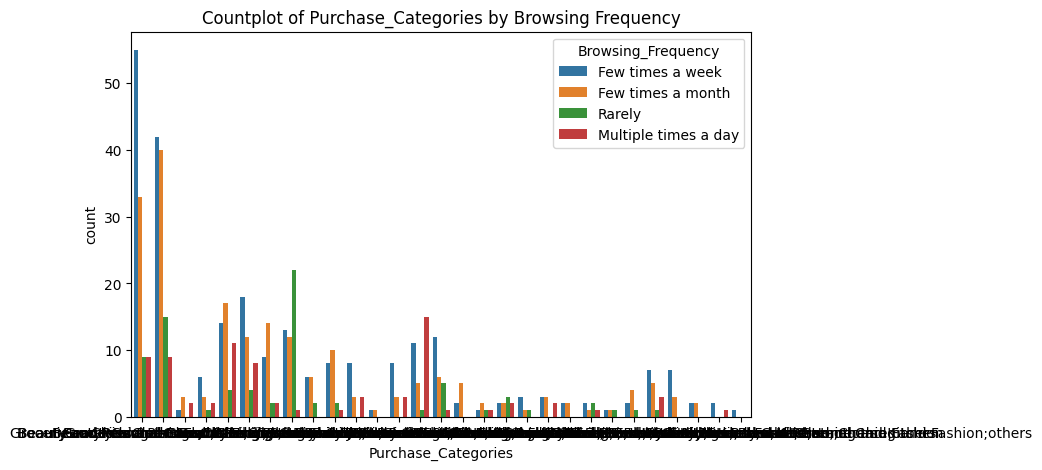

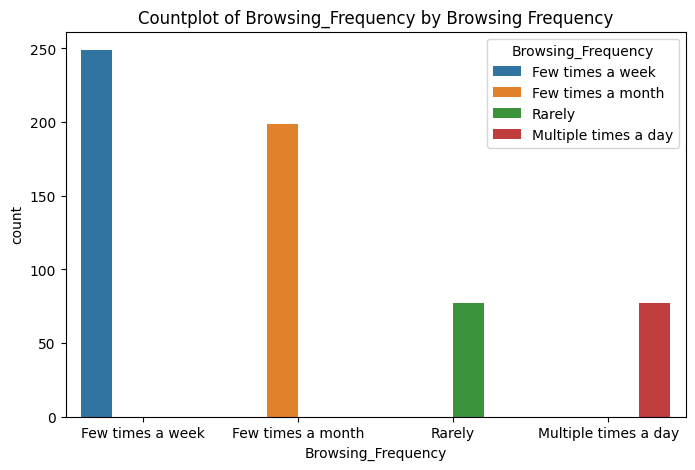

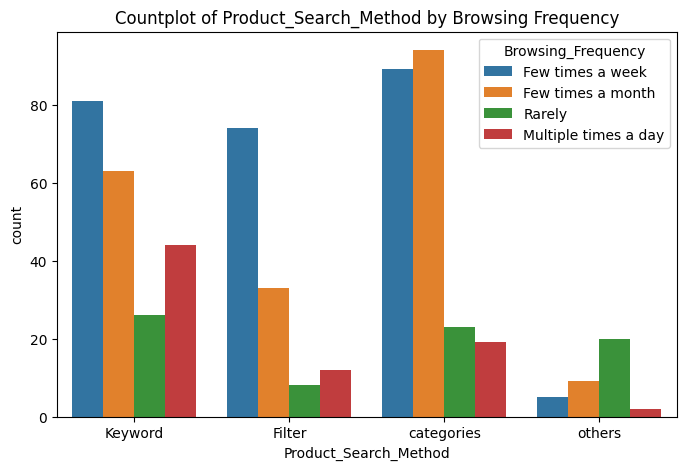

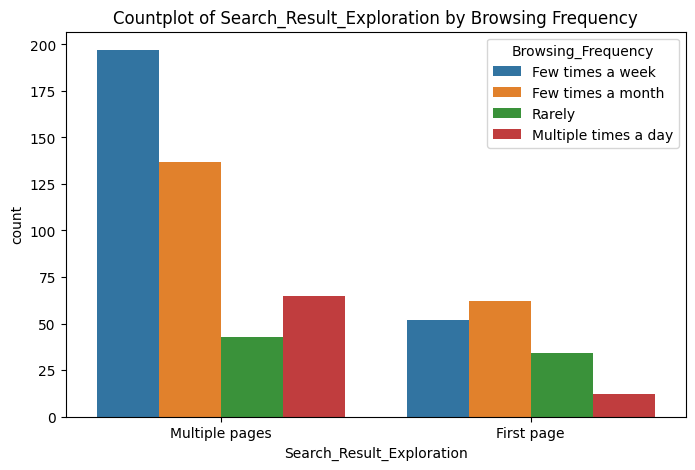

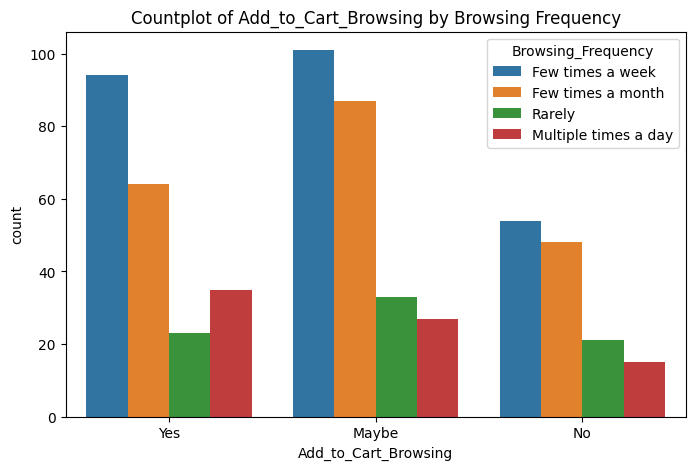

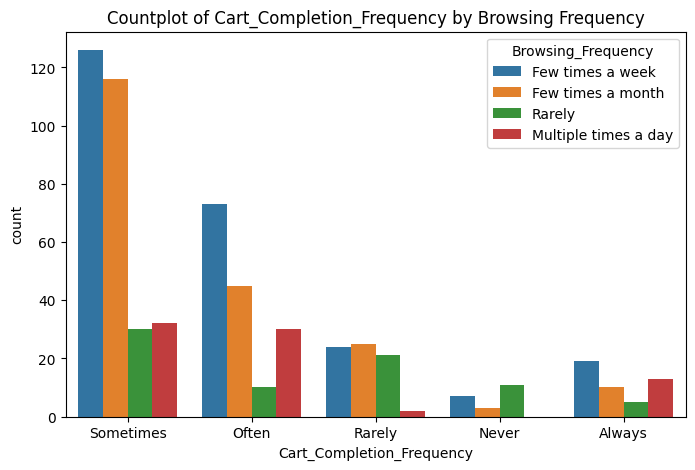

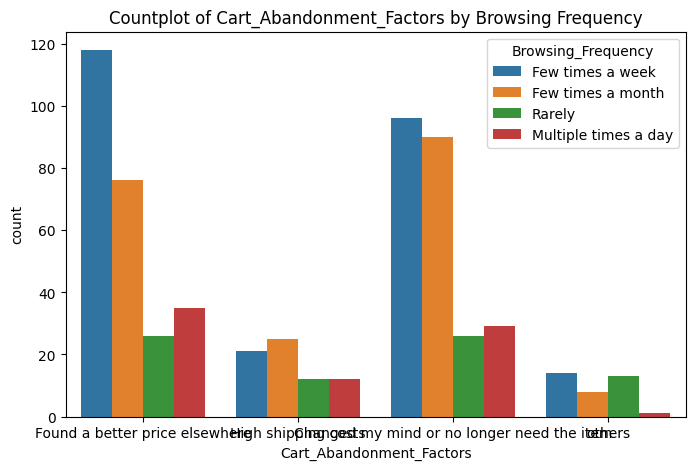

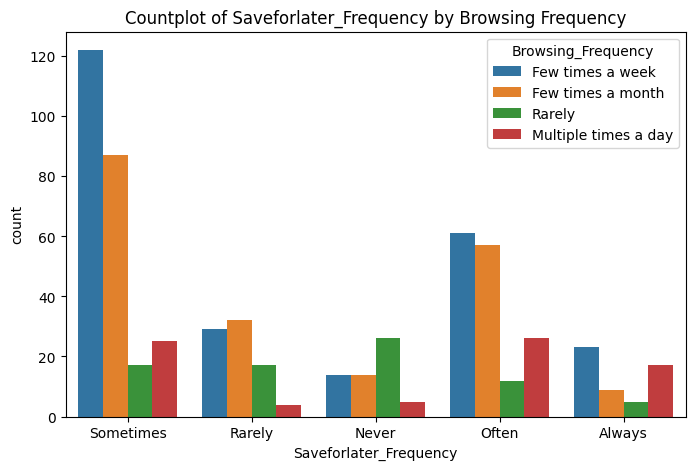

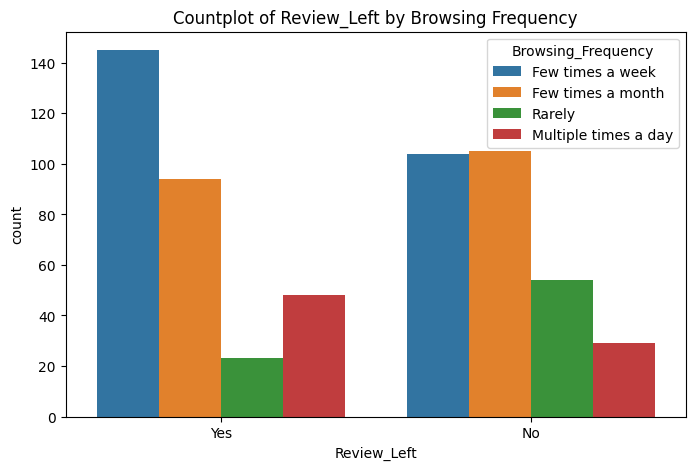

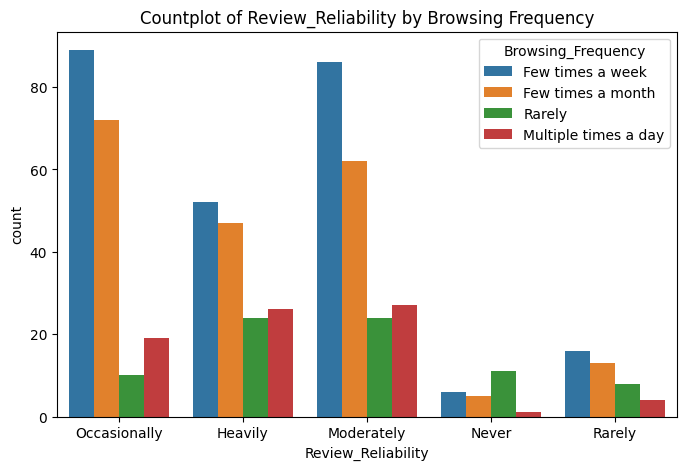

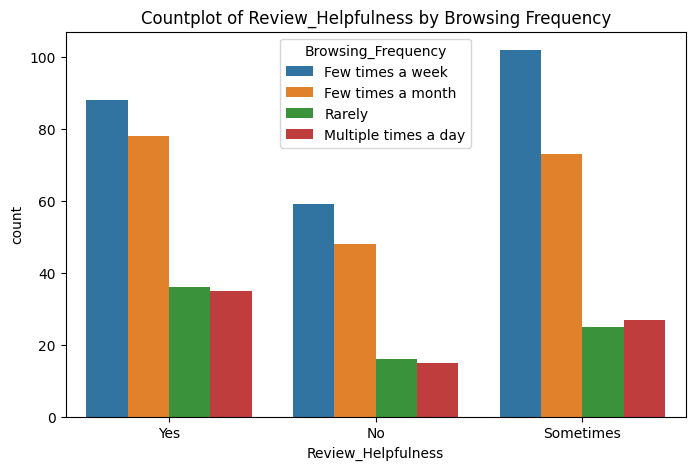

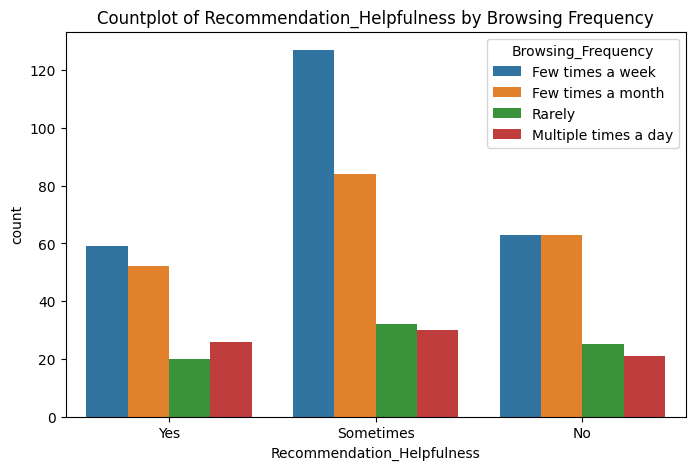

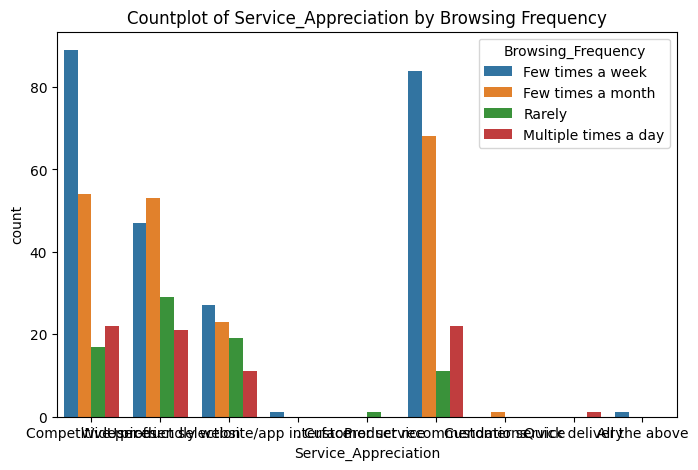

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Remove whitespaces from column names
df_Amazon_cleaned.columns = df_Amazon_cleaned.columns.str.strip()


# Numerical features
Numerical_features = ['age', 'Customer_Reviews_Importance', 'Rating_Accuracy ',
       'Shopping_Satisfaction']



# Categorical features
categorical_features = ['Gender', 'Purchase_Frequency', 'Purchase_Categories',
        'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
        'Recommendation_Helpfulness',
       'Service_Appreciation']

# Bivariate analysis for numerical features vs. target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='age', y=feature, data=df_Amazon_cleaned)
    plt.title(f'Boxplot of {feature} by Purchase Frequency')
    plt.show()

# Bivariate analysis for categorical features vs. target variable
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Browsing_Frequency', data=df_Amazon_cleaned)
    plt.title(f'Countplot of {feature} by Browsing Frequency')
    plt.show()



-The purchase frequency increases with age.

-Most consumers will purchase few times a month or multiple times a week.

-Personalized recommendation frequency sometimes affects the purchase frequency.

-Most consumers purchase frequently when reviews are left.

-Most consumers purchase frequently when the rating is 5 stars.

-The gender distribution shows that femaes lead and they purchase few times a week or few times a month.

-The purchase frequency increases when the shopping satisfaction is between 4-5 stars.

-The purchase frequency increases when the browsing frequency is high,ie, few times a week.

-The purchase categories are affected when the purchase frequency is few times a week.

The personalized recommendation frequency sometimes affects the browsing frequency.

-The highest rate for browsing is few times a week.

-The frequetly browsed product search method is categories which occurs few times a month.

-Consumers tend to browse multiple pages frequently during search result exploration

-The browsing frequency is high when the add to cart browsing is maybe.

-The browsing frequency is high when the cart completion is sometimes.

-The browsing frequency increases when the cart abandonment factors are found a better price elsewhere.

-When the save for later frequency is sometimes, the browsing frequency increases.

-The browsing frequency increases when reviews are left

-When the review reliability is moderate and occassional, the browsing frequency is high

-The review helpfullness sometimes affects the browsing frequency.

-The recommendation frequency sometimes affects the browsing frequency

-When the service appreciation is positive the browsing frequency is high.

-Improvement areas encourage browsing frequency.

In [12]:
column_names=df_Amazon_cleaned.columns
column_names_list=df_Amazon_cleaned.columns.tolist()
column_names

Index(['age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories',
       'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Recommendation_Helpfulness',
       'Shopping_Satisfaction', 'Service_Appreciation'],
      dtype='object')

# **6. FEATURE ENGINEERING.**

Feature engineering is a crucial step in preparing data for machine learning models.The goal is to extract meaningful information and create features that can potentially contribute to the understanding of consumer behavior.

In [13]:
from sklearn.pipeline import Pipeline

# Separate features and target variable
X = df_Amazon_cleaned.drop('Browsing_Frequency', axis=1)
y = df_Amazon_cleaned['Browsing_Frequency']

# Encode the target variable if it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Build the preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data using the trained transformer
X_test_preprocessed = preprocessor.transform(X_test)

#print the results
print('X_train_preprocessed_data', X_train_preprocessed)
print('X_test_preprocessed_data', X_test_preprocessed)
print('y_test_preprocessed_data',y_test)
print('y_train_preprocessed_data', y_train)


X_train_preprocessed_data   (0, 0)	-0.7498616728265725
  (0, 1)	-1.2502350100704027
  (0, 2)	1.542208046712811
  (0, 3)	1.0
  (0, 8)	1.0
  (0, 13)	1.0
  (0, 41)	1.0
  (0, 45)	1.0
  (0, 49)	1.0
  (0, 52)	1.0
  (0, 56)	1.0
  (0, 59)	1.0
  (0, 65)	1.0
  (0, 67)	1.0
  (0, 69)	1.0
  (0, 76)	1.0
  (0, 79)	1.0
  (0, 87)	1.0
  (1, 0)	0.4645607670036675
  (1, 1)	-0.3935925031703121
  (1, 2)	-0.43066980027884333
  (1, 3)	1.0
  (1, 7)	1.0
  (1, 14)	1.0
  (1, 42)	1.0
  :	:
  (479, 58)	1.0
  (479, 66)	1.0
  (479, 67)	1.0
  (479, 72)	1.0
  (479, 75)	1.0
  (479, 78)	1.0
  (479, 82)	1.0
  (480, 0)	-0.7498616728265725
  (480, 1)	-1.2502350100704027
  (480, 2)	-1.4171087237746705
  (480, 3)	1.0
  (480, 8)	1.0
  (480, 19)	1.0
  (480, 42)	1.0
  (480, 45)	1.0
  (480, 49)	1.0
  (480, 52)	1.0
  (480, 57)	1.0
  (480, 58)	1.0
  (480, 65)	1.0
  (480, 67)	1.0
  (480, 69)	1.0
  (480, 76)	1.0
  (480, 79)	1.0
  (480, 87)	1.0
X_test_preprocessed_data   (0, 0)	-0.4462560628690124
  (0, 1)	-1.2502350100704027
  (0, 2)

**The above process includes:**

Dropping unnecessary columns.

Performing train-test split.

Handling missing values for numerical and categorical features.

Scaling numerical features.

Encoding categorical features.

**CHECK FOR IMBALANCED CLASSES.**

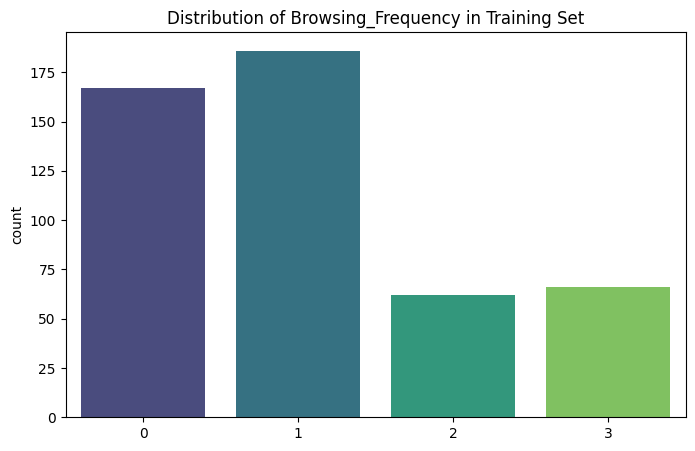

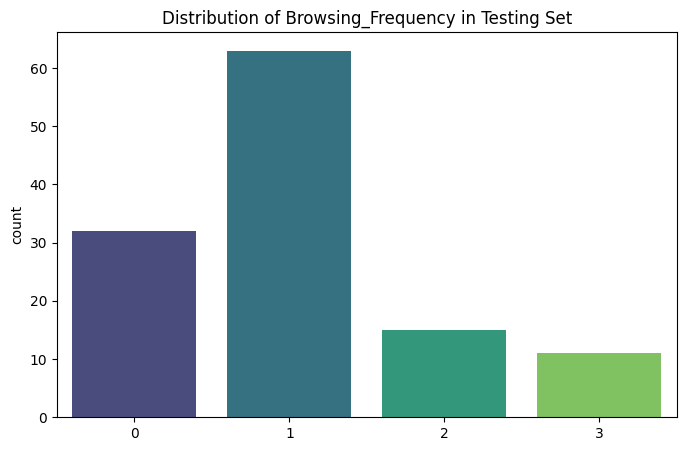

In [14]:

# Plot the distribution of the target variable in the training set
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Browsing_Frequency in Training Set')
plt.show()

# Plot the distribution of the target variable in the testing set
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test, palette='viridis')
plt.title('Distribution of Browsing_Frequency in Testing Set')
plt.show()


This has created two bar plots showing the count of each class in the Browsing_Frequency variable for both the training and testing sets. It helps identify if there is a significant class imbalance.

If there is a severe imbalance,consider techniques like oversampling the minority class, undersampling the majority class, or using different evaluation metrics that are robust to imbalanced classes (e.g., precision, recall, F1-score).

If the classes are reasonably balanced,proceed with training the machine learning model.

In [15]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)


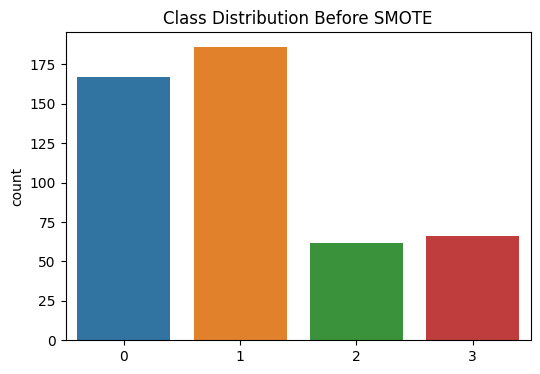

In [16]:
#Target distribution before SMOTE.
import matplotlib.pyplot as plt
import seaborn as sns

#  y_train is the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.show()


In [17]:
#Apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)


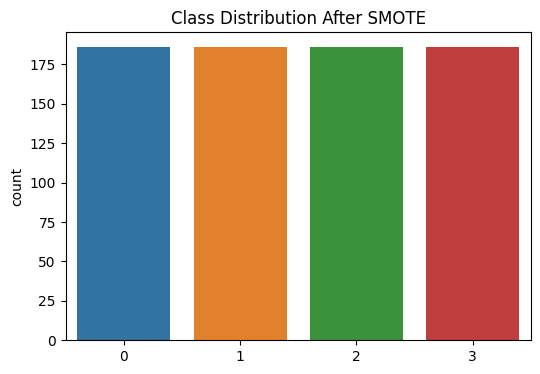

In [18]:
#After SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()


SMOTE has sccessfully Oversampled the minority class.

In [19]:
from imblearn.over_sampling import SMOTE
# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to X_test and y_test
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_preprocessed, y_test)


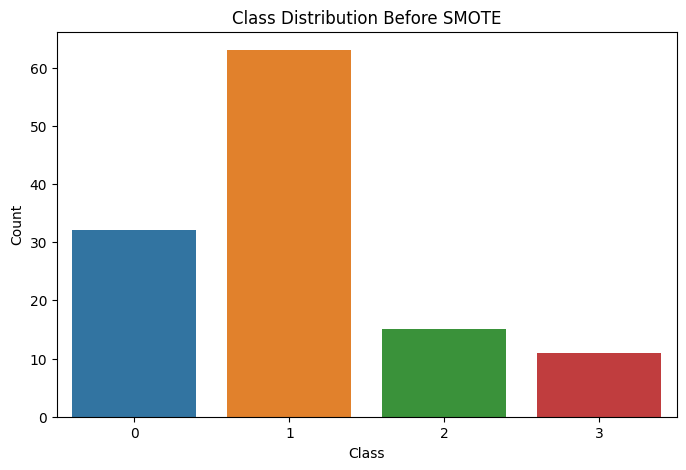

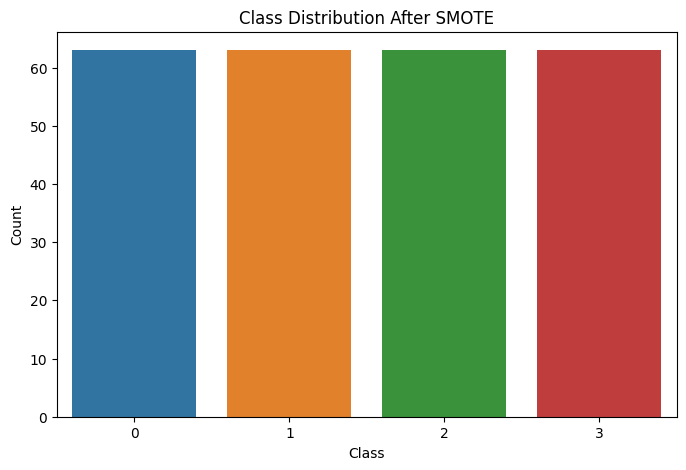

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to plot class distribution
def plot_class_distribution(y, title):
    class_counts = Counter(y)
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(8, 5))
    sns.barplot(x=classes, y=counts)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Plot class distribution before SMOTE
plot_class_distribution(y_test, title='Class Distribution Before SMOTE')

# Plot class distribution after SMOTE
plot_class_distribution(y_test_resampled, title='Class Distribution After SMOTE')


Now X-test and y_test are balanced.

# **7.) MODELLING.**

Given my objectives, I will incorporate classification, clustering (for customer segmentation), and potentially regression for predictive analytics.

Here's a breakdown:

**Customer Segmentation (Clustering):**

clustering algorithms like K-means or hierarchical clustering to group customers based on their behavior and preferences.



**Conversion Rate Optimization (Binary Classification):**

If you're predicting whether a user will convert or not, this becomes a binary classification problem. Logistic Regression, Decision Trees, or Random Forests are common choices.



# **7.1) K-MEANS**

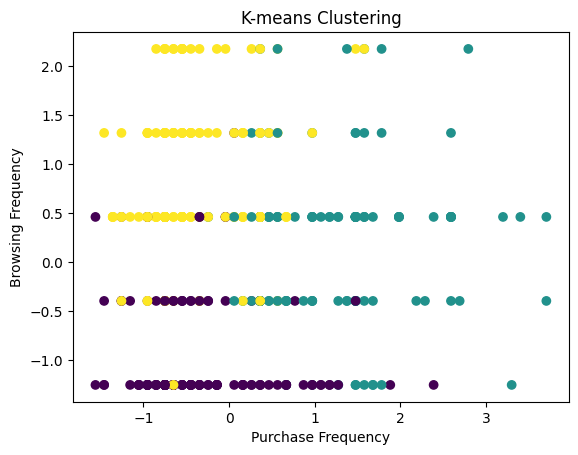

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# X_train_preprocessed is the preprocessed training data (sparse matrix)
# Convert sparse matrix to dense format
X_train_dense = X_train_preprocessed.toarray()

# Choose the number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_train_dense)

# Visualize clusters (for the first two features)
plt.scatter(X_train_dense[:, 0], X_train_dense[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Purchase Frequency')
plt.ylabel('Browsing Frequency')
plt.show()






The above model has clustered consumers into two categories; Purchase_Frequency and Browsing_Frequency. The graph shows that the two features are higly correlated in that a high browsing frequency leads to high purchase frequency.

# **7.2) LOGISTIC REGRESSION.**

Accuracy: 0.4215

Confusion Matrix:
[[ 9 19  1  3]
 [19 36  4  4]
 [ 3  9  3  0]
 [ 6  2  0  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.28      0.26        32
           1       0.55      0.57      0.56        63
           2       0.38      0.20      0.26        15
           3       0.30      0.27      0.29        11

    accuracy                           0.42       121
   macro avg       0.37      0.33      0.34       121
weighted avg       0.42      0.42      0.42       121



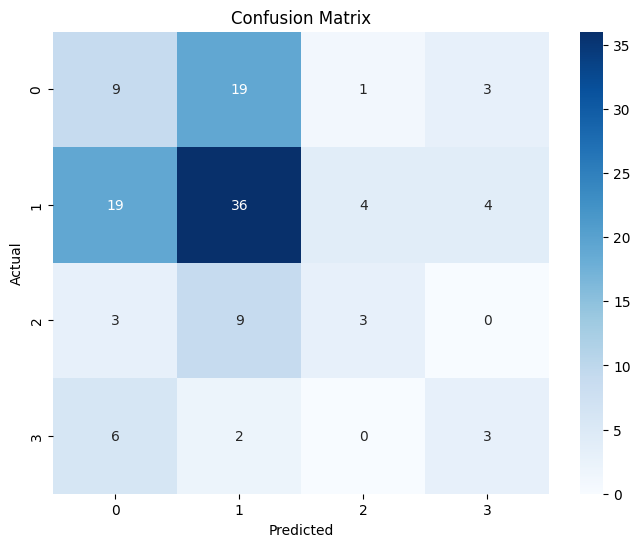

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#X_train_preprocessed and X_test_preprocessed are the feature matrices
# and y_train and y_test are the target variables

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model tothe training data
logreg_model.fit(X_train_preprocessed, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test_preprocessed)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Calculate the confusion matrix
# Predict the labels for the test set
y_pred = logreg_model.predict(X_test_preprocessed)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**Accuracy: 0.4215**

Accuracy is the proportion of correctly classified instances out of the total instances. In this case, the model is correctly predicting the class labels for approximately 42.15% of the samples in the test set.

**Confusion Matrix**

Each row in the matrix represents the actual class, and each column represents the predicted class. For example, the entry in the first row and first column (9) indicates that 9 instances of class 0 were correctly predicted as class 0. The entry in the second row and third column (4) indicates that 4 instances of class 1 were incorrectly predicted as class 2.

**Classification Report.**

**Precision:** Indicates the proportion of true positive predictions among the instances predicted as a particular class.

**Recall:** Represents the proportion of true positive predictions among all actual instances of a particular class. The recall for class 1 is 0.57, indicating that 57% of all actual class 1 instances were correctly predicted.

**F1-score:** The harmonic mean of precision and recall. It provides a balance between precision and recall.


# **7.3) DECISION TREE.**

In [23]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_dense, y_train)

# Predict the labels for the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_preprocessed)

# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Print the results
print(f"Decision Tree Accuracy: {accuracy_decision_tree:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_decision_tree)
print("\nClassification Report:")
print(classification_report_decision_tree)




Decision Tree Accuracy: 0.3802

Confusion Matrix:
[[10 13  3  6]
 [19 26 11  7]
 [ 4  8  3  0]
 [ 1  0  3  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.31      0.30        32
           1       0.55      0.41      0.47        63
           2       0.15      0.20      0.17        15
           3       0.35      0.64      0.45        11

    accuracy                           0.38       121
   macro avg       0.34      0.39      0.35       121
weighted avg       0.42      0.38      0.39       121



Feature Names:
['Feature0', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15', 'Feature16', 'Feature17', 'Feature18', 'Feature19', 'Feature20', 'Feature21', 'Feature22', 'Feature23', 'Feature24', 'Feature25', 'Feature26', 'Feature27', 'Feature28', 'Feature29', 'Feature30', 'Feature31', 'Feature32', 'Feature33', 'Feature34', 'Feature35', 'Feature36', 'Feature37', 'Feature38', 'Feature39', 'Feature40', 'Feature41', 'Feature42', 'Feature43', 'Feature44', 'Feature45', 'Feature46', 'Feature47', 'Feature48', 'Feature49', 'Feature50', 'Feature51', 'Feature52', 'Feature53', 'Feature54', 'Feature55', 'Feature56', 'Feature57', 'Feature58', 'Feature59', 'Feature60', 'Feature61', 'Feature62', 'Feature63', 'Feature64', 'Feature65', 'Feature66', 'Feature67', 'Feature68', 'Feature69', 'Feature70', 'Feature71', 'Feature72', 'Feature73', 'Feature74', 'Feature75', 'Featu

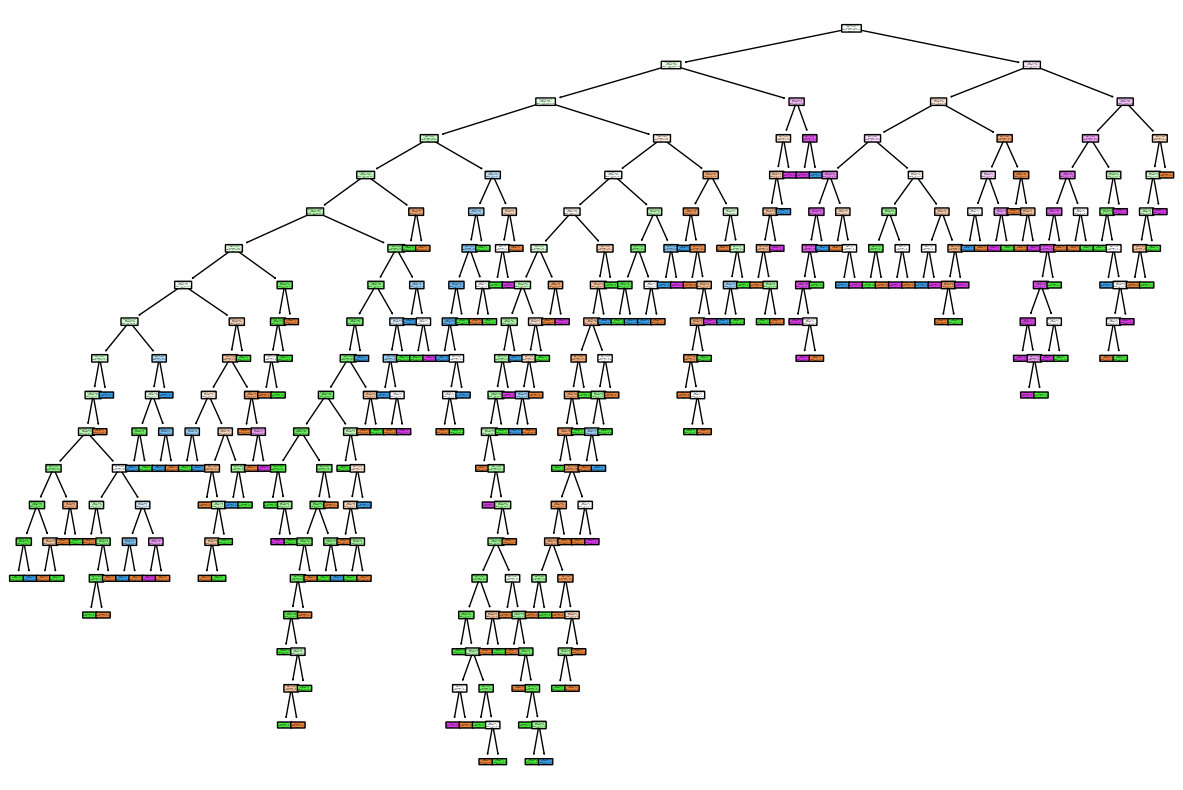

In [24]:
#feature names.
num_features = X_train_dense.shape[1]
feature_names = [f'Feature{i}' for i in range(num_features)]

#class names.
import numpy as np

class_names = np.unique(y_train).tolist()
# Print Feature Names
print("Feature Names:")
print(feature_names)

# Print Class Names
print("\nClass Names:")
print(class_names)
# Convert class names to strings
class_names = list(map(str, class_names))



# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()



Gridsearch CV

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree Accuracy: 0.4545

Confusion Matrix:
[[11 16  0  5]
 [18 36  4  5]
 [ 5  8  2  0]
 [ 0  4  1  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.34      0.33        32
           1       0.56      0.57      0.57        63
           2       0.29      0.13      0.18        15
           3       0.38      0.55      0.44        11

    accuracy                           0.45       121
   macro avg       0.39      0.40      0.38       121
weighted avg       0.45      0.45      0.45       121



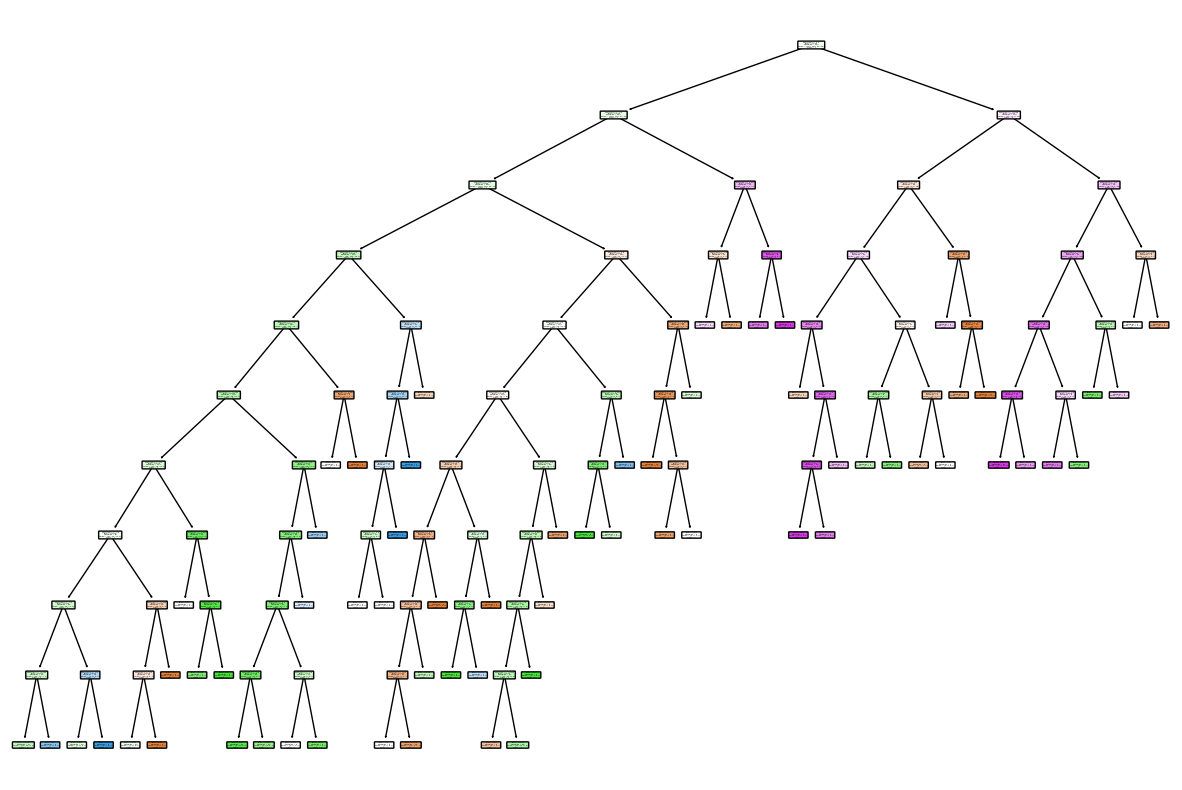

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_dense, y_train)

# Get the best parameters and retrain the model
best_params = grid_search.best_params_
best_decision_tree_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Retrain the model with the best parameters
best_decision_tree_model.fit(X_train_dense, y_train)

# Predict the labels for the test set
y_pred_decision_tree = best_decision_tree_model.predict(X_test_preprocessed)

# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Print the results
print(f"Decision Tree Accuracy: {accuracy_decision_tree:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_decision_tree)
print("\nClassification Report:")
print(classification_report_decision_tree)

# Plot the Decision Tree with the best parameters
plt.figure(figsize=(15, 10))
plot_tree(best_decision_tree_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()


# **7.4) ENSEMBLE METHODS**

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning (adjust as needed)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_dense, y_train)

# Get the best parameters and retrain the model
best_params_rf = grid_search_rf.best_params_
best_random_forest_model = grid_search_rf.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest:", best_params_rf)

# Retrain the Random Forest model with the best parameters
best_random_forest_model.fit(X_train_dense, y_train)

# Predict the labels for the test set
y_pred_random_forest = best_random_forest_model.predict(X_test_preprocessed)

# Evaluate the Random Forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)

# Print the results for Random Forest
print(f"Random Forest Accuracy: {accuracy_random_forest:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_random_forest)
print("\nClassification Report:")
print(classification_report_random_forest)




Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.5207

Confusion Matrix:
[[11 19  0  2]
 [13 47  1  2]
 [ 2 11  2  0]
 [ 5  3  0  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.34      0.35        32
           1       0.59      0.75      0.66        63
           2       0.67      0.13      0.22        15
           3       0.43      0.27      0.33        11

    accuracy                           0.52       121
   macro avg       0.51      0.37      0.39       121
weighted avg       0.52      0.52      0.49       121



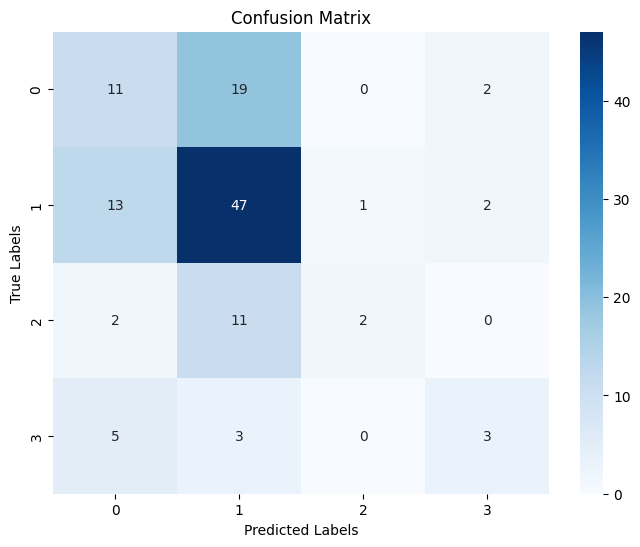

In [27]:
import seaborn as sns

# Define a function to plot a confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot the Confusion Matrix for Random Forest
plot_confusion_matrix(conf_matrix_random_forest, class_names)


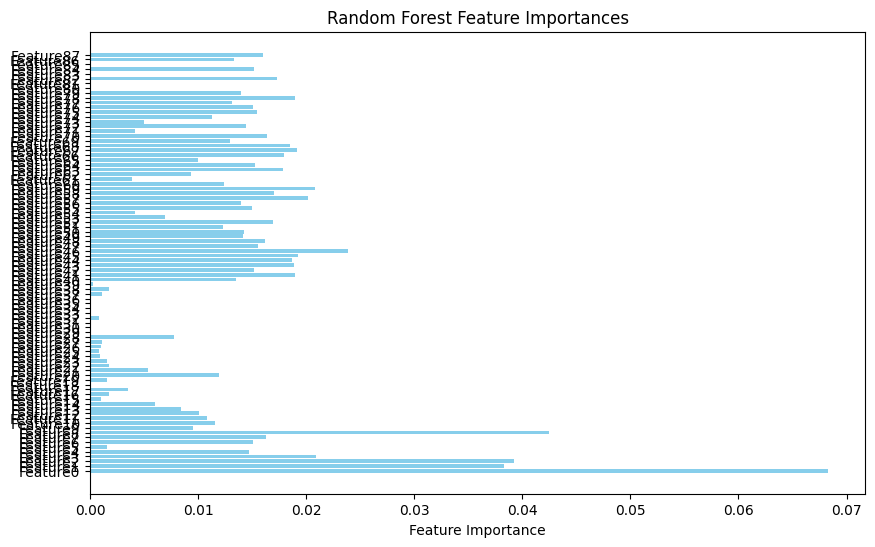

In [28]:
# Get feature importances from the trained Random Forest model
feature_importances = best_random_forest_model.feature_importances_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


# **7.5) XG BOOST.**

In [29]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost hyperparameter tuning
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(class_names), random_state=42)

# Use GridSearchCV for XGBoost hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_dense, y_train)

# Get the best parameters and retrain the model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Print the best parameters
print("Best Parameters for XGBoost:", best_params_xgb)

# Retrain the XGBoost model with the best parameters
best_xgb_model.fit(X_train_dense, y_train)

# Predict the labels for the test set
y_pred_xgb = best_xgb_model.predict(X_test_preprocessed)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

# Print the results for XGBoost
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(classification_report_xgb)


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Accuracy: 0.0826

Confusion Matrix:
[[ 0  0 17 15]
 [ 0  0 24 39]
 [ 0  0  3 12]
 [ 0  0  4  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        63
           2       0.06      0.20      0.10        15
           3       0.10      0.64      0.17        11

    accuracy                           0.08       121
   macro avg       0.04      0.21      0.07       121
weighted avg       0.02      0.08      0.03       121



An accuracy of 8.26% suggests that there is room for improvement, and you may need to revisit the data, features, and model configuration to enhance performance.

# **8.) EVALUATION.**

# **8.1) Evaluate XGBoost Model.**

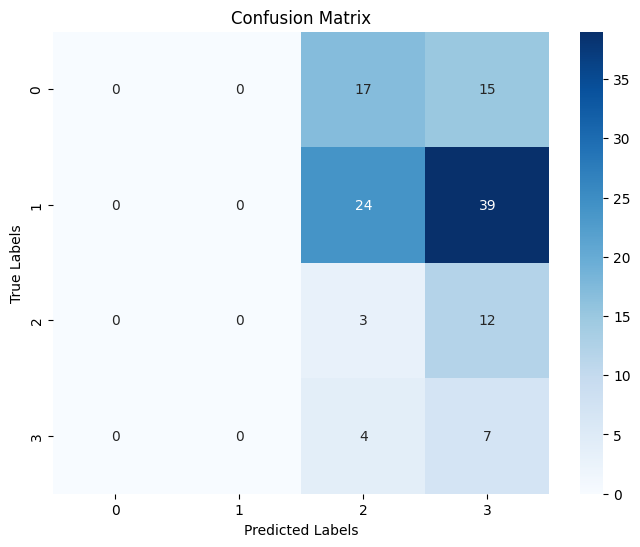

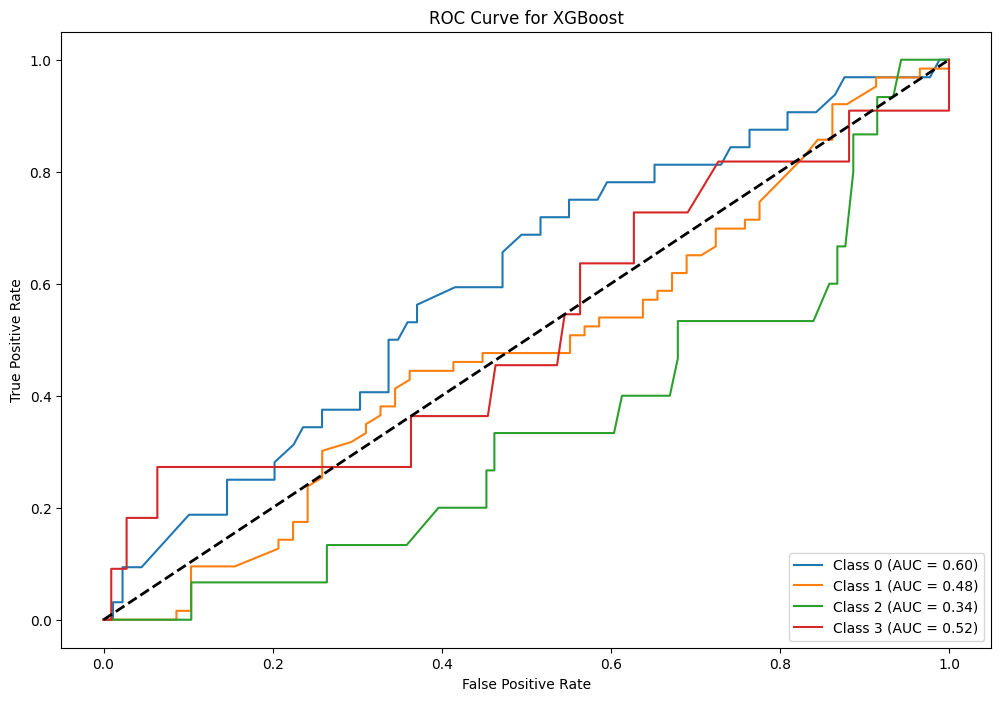

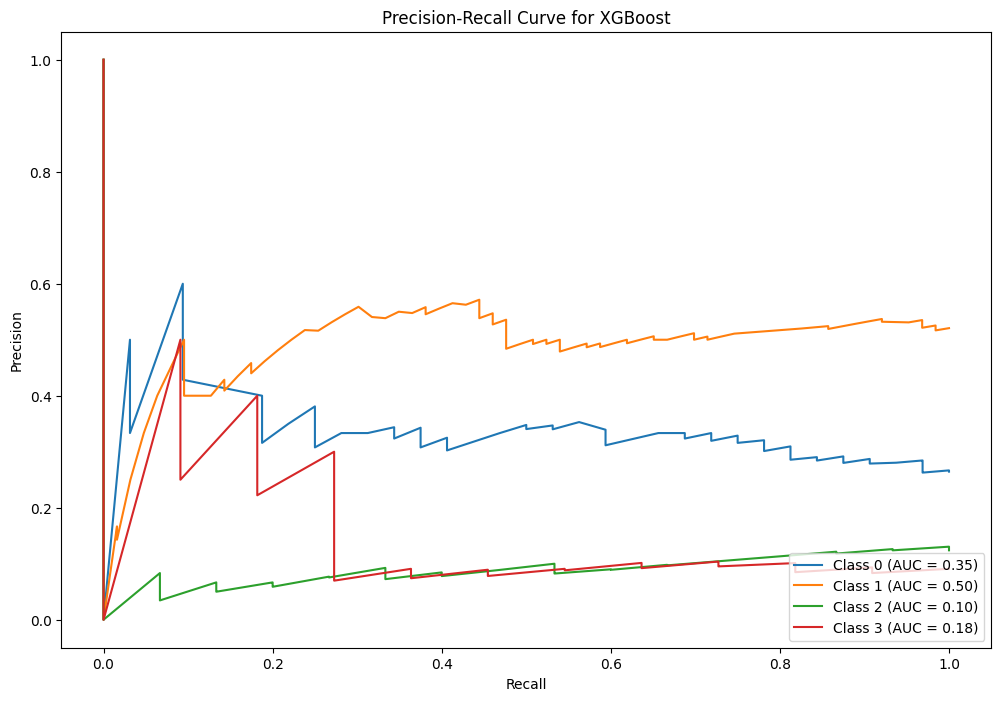

XGBoost Accuracy: 0.0826

Confusion Matrix:
[[ 0  0 17 15]
 [ 0  0 24 39]
 [ 0  0  3 12]
 [ 0  0  4  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        63
           2       0.06      0.20      0.10        15
           3       0.10      0.64      0.17        11

    accuracy                           0.08       121
   macro avg       0.04      0.21      0.07       121
weighted avg       0.02      0.08      0.03       121



In [30]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

# Plot the Confusion Matrix
plot_confusion_matrix(conf_matrix_xgb, class_names)

# Calculate and plot ROC curve and AUC for each class
plt.figure(figsize=(12, 8))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, best_xgb_model.predict_proba(X_test_preprocessed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

# Calculate and plot precision-recall curve and AUC for each class
plt.figure(figsize=(12, 8))

precision = dict()
recall = dict()
pr_auc = dict()

for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, best_xgb_model.predict_proba(X_test_preprocessed)[:, i])
    pr_auc[i] = average_precision_score(y_test == i, best_xgb_model.predict_proba(X_test_preprocessed)[:, i])

# Plot precision-recall curves
for i in range(len(class_names)):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

# Print Classification Report and Accuracy
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(classification_report_xgb)


Evaluated XGBoost model using various metrics. consider metrics like precision, recall, and F1-score, along with the confusion matrix. Additionally, we'll create a ROC curve and calculate the AUC (Area Under the Curve) for a multiclass classification problem.

# **8.2) Evaluate Logistic Regression Model**

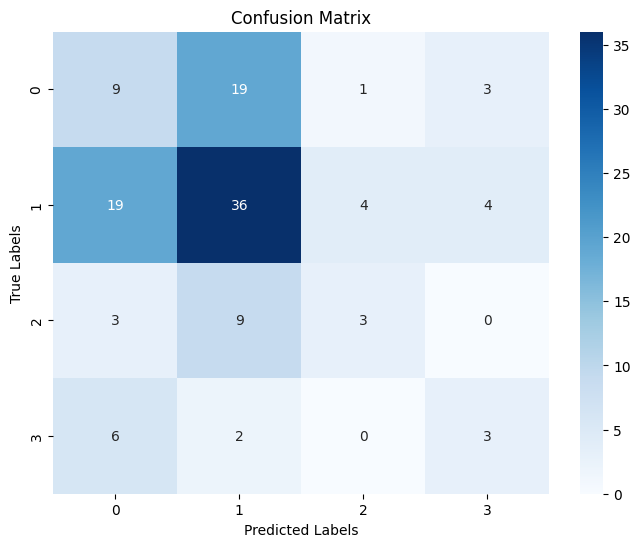

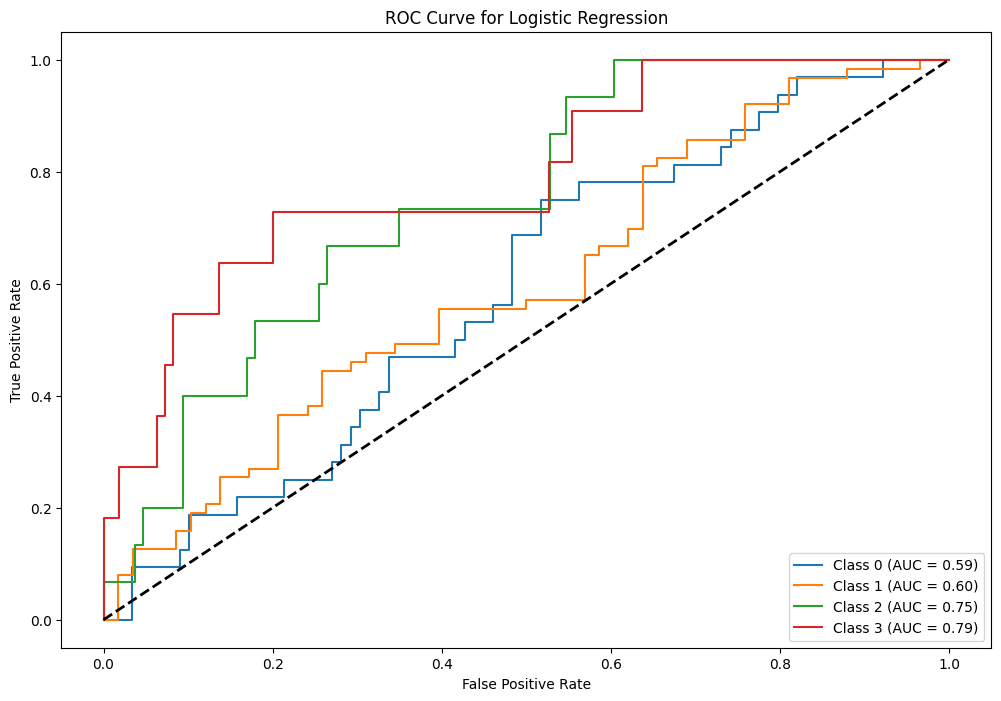

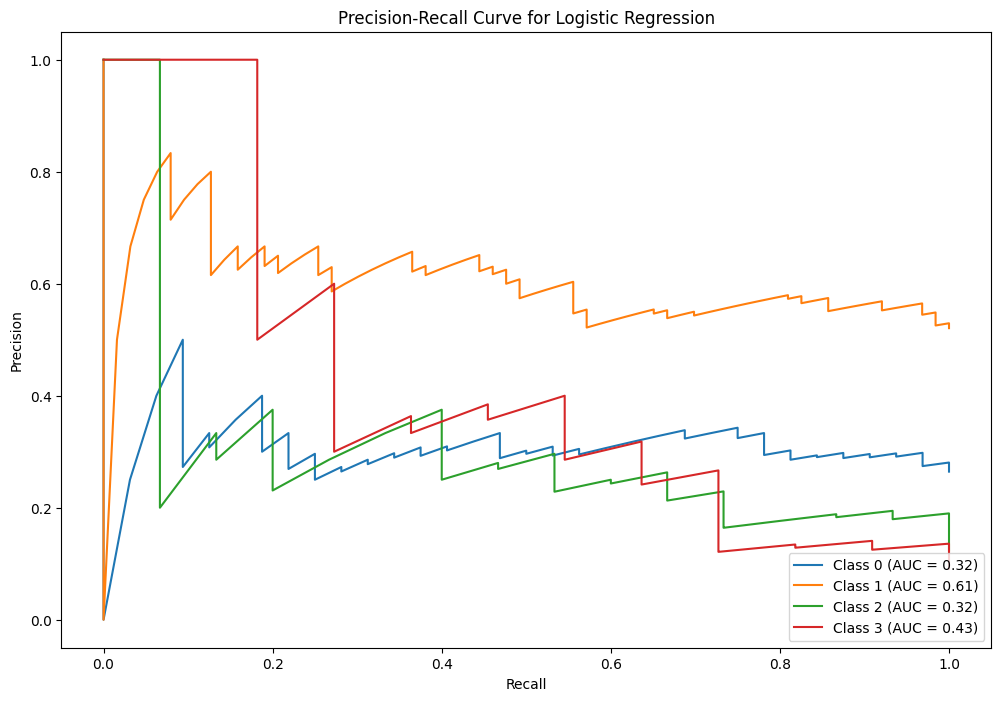

Logistic Regression Accuracy: 0.4215

Confusion Matrix:
[[ 9 19  1  3]
 [19 36  4  4]
 [ 3  9  3  0]
 [ 6  2  0  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.28      0.26        32
           1       0.55      0.57      0.56        63
           2       0.38      0.20      0.26        15
           3       0.30      0.27      0.29        11

    accuracy                           0.42       121
   macro avg       0.37      0.33      0.34       121
weighted avg       0.42      0.42      0.42       121



In [31]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_dense, y_train)

# Predict the labels for the test set
y_pred_logistic = logistic_model.predict(X_test_preprocessed)

# Evaluate Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
classification_report_logistic = classification_report(y_test, y_pred_logistic)



# Plot the Confusion Matrix
plot_confusion_matrix(conf_matrix_logistic, class_names)

# Calculate and plot ROC curve and AUC for each class
plt.figure(figsize=(12, 8))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, logistic_model.predict_proba(X_test_preprocessed)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Calculate and plot precision-recall curve and AUC for each class
plt.figure(figsize=(12, 8))

precision = dict()
recall = dict()
pr_auc = dict()

for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, logistic_model.predict_proba(X_test_preprocessed)[:, i])
    pr_auc[i] = average_precision_score(y_test == i, logistic_model.predict_proba(X_test_preprocessed)[:, i])

# Plot precision-recall curves
for i in range(len(class_names)):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Print Classification Report and Accuracy
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_logistic)
print("\nClassification Report:")
print(classification_report_logistic)


**Logistic Regression Model:**

The logistic regression model has an accuracy of 0.4215, providing a moderate level of performance.
Precision, recall, and F1-score vary across classes, indicating potential challenges in certain categories.
Consider exploring more sophisticated models or feature engineering to enhance predictive capabilities

# **8.3) Evaluate K-Means.**

Silhouette Score for K-means: 0.0852


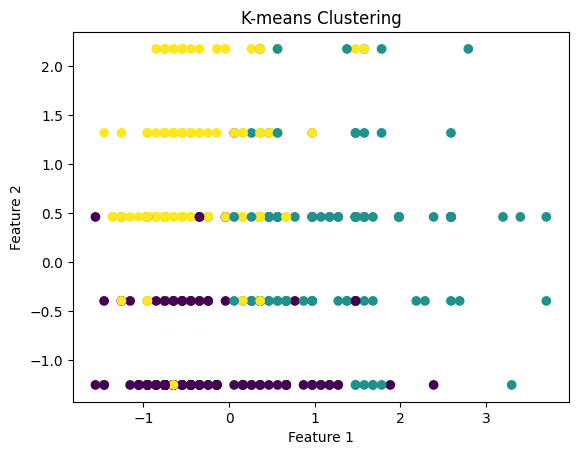

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X_train_preprocessed is the preprocessed training data (sparse matrix)

# Convert sparse matrix to dense format
X_train_dense = X_train_preprocessed.toarray()

# Choose the number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_train_dense)

# Evaluate K-means clustering
silhouette_avg = silhouette_score(X_train_dense, clusters)
print(f"Silhouette Score for K-means: {silhouette_avg:.4f}")

# Visualize clusters (for the first two features)
plt.scatter(X_train_dense[:, 0], X_train_dense[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**K-Means Clustering:**

Clustering may not be suitable for the given task as it is an unsupervised method.
Clustering is more appropriate for tasks where the data naturally groups into clusters, whereas classification models are designed for labeled data.

# **8.4) Evaluate Decision Trees Model**

Decision Tree Accuracy: 0.3802

Confusion Matrix:
[[10 13  3  6]
 [19 26 11  7]
 [ 4  8  3  0]
 [ 1  0  3  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.31      0.30        32
           1       0.55      0.41      0.47        63
           2       0.15      0.20      0.17        15
           3       0.35      0.64      0.45        11

    accuracy                           0.38       121
   macro avg       0.34      0.39      0.35       121
weighted avg       0.42      0.38      0.39       121



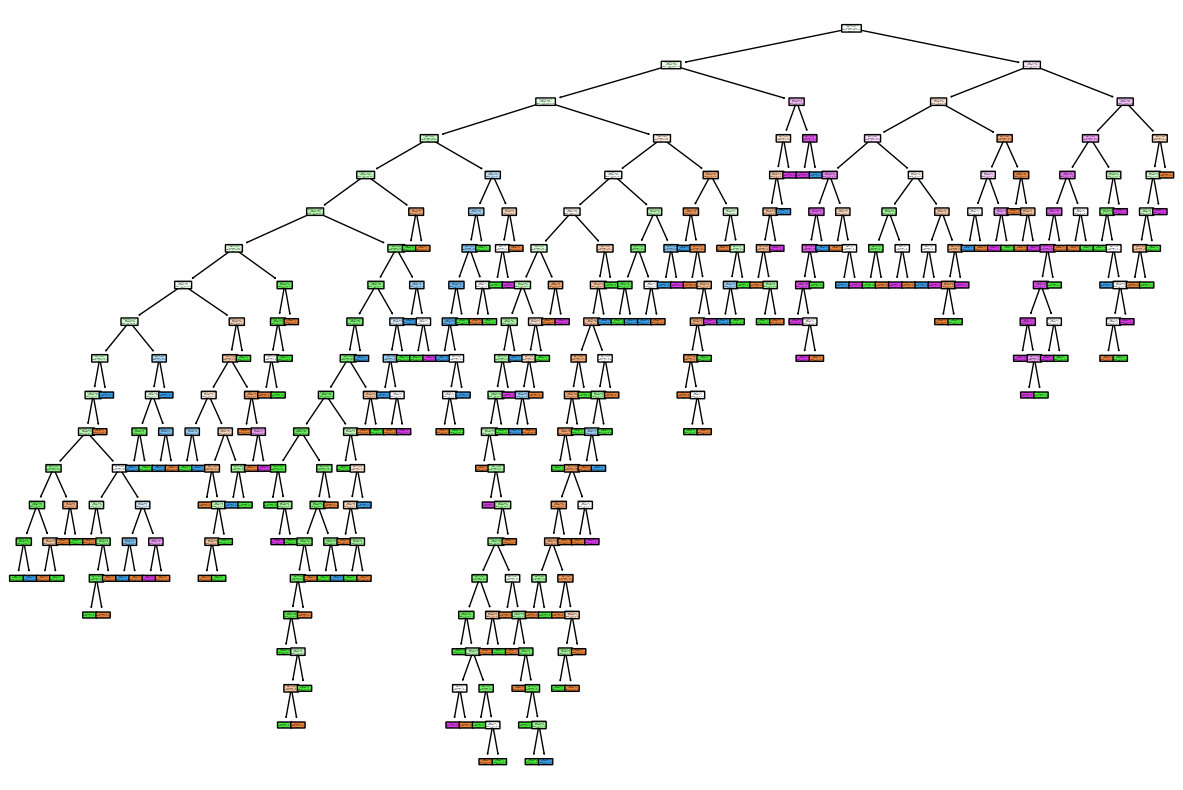

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming X_train_preprocessed and y_train are the preprocessed training data and labels
# Similarly, X_test_preprocessed and y_test for the test set

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_preprocessed, y_train)

# Predict the labels for the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_preprocessed)

# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

# Print the results
print(f"Decision Tree Accuracy: {accuracy_decision_tree:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_decision_tree)
print("\nClassification Report:")
print(classification_report_decision_tree)

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()


**Decision Tree Model:**

The decision tree model has a relatively low accuracy of 0.38, indicating that it may not perform well on the given dataset.
The precision, recall, and F1-score for each class vary, suggesting that the model struggles with classifying certain categories.
The decision tree visualization can provide insights into how the model makes decisions, but the complexity may affect its generalization.

# **9) DEPLOYMENT.**

# **9.1) Save model using joblib.**

In [34]:
#Save the model
import joblib
from sklearn.linear_model import LogisticRegression

# Example: train and save a Logistic Regression model
model = LogisticRegression(random_state=42)
# ... Train the model ...

# Save the model
joblib.dump(model, 'logistic_model.joblib')


['logistic_model.joblib']

# **9.2) Deploy using Streamlit**

In [35]:
#Create a streamlit app for deployment
!pip install streamlit


In [36]:
#Create a Streamlit app in a file named app_streamlit.py:
import streamlit as st
import joblib
import numpy as np
from scipy import sparse


# Load the trained model
model = joblib.load('logistic_model.joblib')

def preprocess_input(data):
    # Convert the input data to a CSR matrix if needed
    input_csr = sparse.csr_matrix(data)  # Assuming data is a dense array

    # Implement any additional preprocessing logic if required

    return input_csr


def main():
    st.title('Logistic Regression Predictor')

    # Collect user input features
    feature1 = st.slider('Feature 1', min_value=0.0, max_value=1.0, value=0.5)
    feature2 = st.slider('Feature 2', min_value=0.0, max_value=1.0, value=0.5)

    # Create a user input array
    user_input = np.array([[feature1, feature2]])

    # Preprocess the user input
    processed_input = preprocess_input(user_input)

    if st.button('Predict'):
        # Make predictions
        prediction = model.predict(processed_input)

        # Display the prediction
        st.success(f'Prediction: {prediction[0]}')

if __name__ == '__main__':
    main()


2023-12-05 09:45:05.997 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


# **11) RECOMMENDATIONS.**

**Personalized Recommendations:** Implement a robust recommendation engine based on user preferences and historical data to enhance the personalized shopping experience.

**User Interface Optimization:** Improve the user interface based on insights gained from the user journey analysis, making navigation more intuitive and user-friendly.

**Targeted Marketing Campaigns:** Develop targeted marketing campaigns tailored to specific customer segments, optimizing advertising efforts and increasing ROI.

**Dynamic Pricing Strategies:** Explore dynamic pricing models based on customer behavior, demand patterns, and competitor analysis.

**Customer Engagement Initiatives**: Introduce loyalty programs, special promotions, and interactive content to enhance customer engagement and retention.

# **10) CONCLUSION**

In conclusion, this project provides a comprehensive understanding of customer behavior on e-commerce platforms, offering valuable insights that can drive strategic decision-making. By implementing the recommended strategies, businesses can not only enhance the user experience but also increase customer satisfaction, loyalty, and ultimately, revenue. As the e-commerce landscape continues to evolve, staying attuned to customer behavior is pivotal for maintaining a competitive edge in the market.